In [3]:

from numpy.random import seed
seed(42)

import pandas as pd
import numpy as np
import nltk

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras import optimizers
from keras import losses
from keras import activations
from keras.layers.normalization import BatchNormalization

from keras.layers import Dense, Embedding, Softmax, Dropout, Input, Concatenate
from keras.layers import SimpleRNN, LSTM, GlobalAveragePooling1D, Bidirectional
from keras.layers import Convolution1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

from keras import backend as K
from keras.engine.topology import Layer
from keras import regularizers

from sklearn.utils import class_weight

import keras_metrics as km

import talos as ta
from talos.model.normalizers import lr_normalizer

import itertools
import os


Using TensorFlow backend.


In [5]:
directory = 'data/'

In [6]:
# Terms

set_0 = {'rate', 'semester', '15th', 'clarity', 'noooope', 'cardiac', 'deadline', 'isolated', 'thrive', 'realize', 'meal', 'asian', 'relapse', 'refresh', 'diagnose', 'frequency', 'maintain', '8ounces', 'psychologist', 'caregiver', 'caution', '3however', 'heart', 'alienation', 'km', 'woe', 'imo', 'mellow', 'cigarette', 'desperately', 'discernable', 'hike', 'passion', 'perseverance', 'ptsd', 'scrapbooke', 'nmother', 'elevate', 'lightheaded', 'seek', 'ignore', 'residential', 'body', 'triggering', 'frustrate', 'south', 'disorders', 'symptom', 'restricting', 'saddle', 'october', 'afloat', 'isolate', 'fathom', 'continuous', 'severe', 'ride', 'buddy', 'ednos', 'hierarchy', 'inpatient', '144', 'passionate', 'unbearably', 'electrolyte', 'accountable', 'fridays', 'misunderstood', 'fast', 'batshit', 'proed', 'pound', 'unstable', 'mechanism', 'healthy', 'weigh', 'lamictal', 'struggle', '93', 'garment', 'vyvanse', 'dietician', 'unattractive', 'hyperthyroidism', 'leotard', 'dysmorphia', 'weight', 'apostrophe', 'clarita', 'recovery', 'anorexic', 'bulimia', 'specialize', 'mpa', 'therapist', 'recover', 'eat', 'ed', 'anorexia', 'disorder'}
set_1 = {'adios', 'brendajames', 'darkslay', 'gt', 'halfbro', 'inactive', 'pikaokulucky7', 'shoutouts', 'soccrmom', 'stabbd', 'stale', 'virgoth', 'upwards', 'strategy', 'economic', 'print', 'negative', 'cheesecake', 'furyball', 'noooo', 'whisky', 'hetero', 'pathologist', 'malnourishment', 'february', 'delicate', 'aldc', 'anx', 'authority', 'dissociate', 'peer', 'seeing', 'pharmacology', 'successful', 'ad', 'memorize', 'commit', 'shrink', 'identity', 'booze', 'lightweight', 'liquor', 'poisoning', 'swig', 'shelter', 'flashback', 'linger', 'uncommon', 'behavioral', 'dismiss', 'sheer', 'suggestive', 'drug', 'kite', 'tamaz', 'valium', 'apache', 'helicopter', 'partizan', 'shitshow', 'unstoppable', 'unable', 'massage', 'alcoholic', 'takin', 'beg', 'crying', 'sarcastic', 'uptight', 'pms', 'wheelchair', 'stress', 'patien', 'insomnia', 'noticeably', 'pantie', 'drinking', 'attachment', 'smoking', 'diary', 'economics', 'bum', 'oman', 'harm', 'paige', 'charliehorse', 'suicidal', 'calmly', 'sleep', 'cupple', 'asleep', 'traumatic', 'dissociative', 'daydream', 'emo', 'anxiety', 'depressed', 'scar', 'anxious', 'depression'}
set_2 = {'urine', 'stone', 'climb', 'truely', 'fearbola', 'insertion', 'headache', 'syndrome', 'clinic', 'diagnose', 'cancer', 'germ', 'drained', 'headed', 'likewise', 'seene', 'eveybody', 'revise', 'awful', 'airborne', 'droplet', 'particle', 'immune', 'senstive', 'appointment', 'blind', 'furbabie', 'slobbery', 'volunteer', 'fatigue', 'fibromyalgia', 'autistic', 'mute', 'watte', 'standpoint', 'encouragement', 'deal', 'crohn', 'informed', 'suffer', 'aspiration', 'inflammation', 'tarde', 'pig', 'remark', 'aids', 'nausea', 'doctor', 'hospitalize', 'autism', 'xenophobia', 'understate', 'contract', 'relative', 'runny', 'foodborne', 'salmonella', 'viral', 'africa', 'discharge', 'infectious', 'painful', 'est', 'pep', 'facility', 'surgery', 'unerected', 'kidney', 'monger', 'healing', 'pity', 'cure', 'cramp', 'outbreak', 'asthma', 'sinus', 'sickness', 'transfusion', 'fever', 'thyroid', 'infection', 'pneumonia', 'blindness', 'staff', 'spread', 'neb', 'pain', 'uncurable', 'therapist', 'virus', 'pcp', 'ibs', 'hiv', 'endo', 'appt', 'therpist', 'hrt', 'flu', 'disease', 'ebola'}
set_3 = {'demeaning', 'regrow', 'snag', 'spool', 'entp', 'abuse', 'familiar', 'text', 'married', 'aide', 'od', 'oxygen', 'sarcoidosis', 'flaky', 'unreliable', 'grieve', 'partner', 'behaviour', 'genuinely', 'trend', 'girlfriend', 'sexually', 'mother', 'break', 'hopeless', 'sponge', 'torment', 'asd', 'authentic', 'cosplayer', 'fulfil', 'maximus', 'chair', 'kid', 'curriculum', 'anger', 'old', 'friend', 'assumption', 'communicate', 'atm', 'dilemma', 'express', 'isle', 'gentleman', 'shy', 'marry', 'notch', 'flow', 'impulsive', 'colourblind', 'courageous', 'shaven', 'typo', 'electric', 'divorce', 'sexual', 'snoop', 'mom', 'insensitive', 'son', 'grin', 'husband', 'client', 'incredibly', 'dad', 'agao', 'newly', 'asda', 'beverly', 'hills', 'housewives', 'thanksgiving', 'license', 'impression', 'google', 'humiliation', 'ex', 'infj', 'abusive', 'favour', 'unfulfilling', 'enraging', 'snap', 'tell', 'toothbrush', 'denial', 'father', 'molester', 'boyfriend', 'tickle', 'upfront', 'dfw', 'daycare', 'immature', 'sister', 'child', 'daughter', 'relationship', 'parent'}
set_4 = {'serve', '209', 'omelet', 'hummus', '32', 'portion', 'plan', 'bran', 'blend', 'sauce', 'fast', 'jalfrezi', 'spelt', 'pretzel', 'onion', 'pesto', 'salt', 'nothinglunch', 'lemon', 'cookies', 'cracker', 'fiberone', '140', '150', '28', 'banana', 'cherry', 'patty', 'omega', 'stevia', 'caffeine', 'mini', 'bar', 'horseback', 'trek', 'veggie', 'garlic', 'multi', 'unsweetened', 'vegetarian', 'vegan', 'mix', 'white', 'frozen', 'rice', 'carrot', 'sausage', 'fiber', '34', 'sandwich', 'zucchini', 'oz', 'pasta', 'vanilla', 'spinach', 'food', 'hungry', 'cinnamon', 'bean', 'joe', 'trader', 'potato', 'fridge', '100', 'autumn', 'yogurt', 'fruit', 'cheese', 'bread', 'bagel', 'truvia', 'meal', 'almond', 'mg', 'greek', 'tablespoon', 'snack', 'cream', 'coffee', 'milk', 'eat', 'peanut', 'calorie', 'curry', 'quest', 'cereal', 'butter', 'stack', 'lunch', '200', 'protein', 'dinner', 'cal', 'powder', 'egg', 'cup', 'fage', 'total', 'chicken', 'breakfast'}
set_5 = {'compulsively', 'dishonest', 'restrict', 'mentality', 'underweight', 'wight', 'happiness', 'whoops', 'borderline', 'weighing', '2200', 'fist', 'welp', 'gratifying', 'eveeeer', '40lbs', 'dainty', 'cardio', 'eatingdisorder', '5k', 'f22', '181', 'unnatractive', 'morbidly', 'biking', 'bulky', '188', 'cw', 'plateaus', '256', 'look', '22', '122', 'promote', '158', 'wl', 'expression', 'classify', 'eighteen', '148', 'liar', '65', 'strenuous', 'yeeeah', 'starting', 'sizes', '270', '96', 'scale', 'lw', 'flattering', '110', 'mirror', 'exercise', 'waist', 'thigh', 'big', 'feel', '96lbs', 'yo', '107', 'loss', 'healthy', '30e', 'excess', 'need', 'scare', 'corset', 'tall', 'hw', 'sexy', '92', '132', '170', 'skinny', '123', 'ft', 'ugw', 'cm', 'body', 'ss', '22f', '10lbs', 'weigh', 'unhealthy', '120', 'lbs', 'muscle', 'obese', 'overweight', 'size', 'cus', 'height', 'lb', 'bmi', 'gain', 'pound', 'fat', 'lose', 'weight'}
set_6 = {'urine', 'stone', 'climb', 'truely', 'fearbola', 'insertion', 'headache', 'syndrome', 'clinic', 'diagnose', 'cancer', 'germ', 'drained', 'headed', 'likewise', 'seene', 'eveybody', 'revise', 'awful', 'airborne', 'droplet', 'particle', 'immune', 'senstive', 'appointment', 'blind', 'furbabie', 'slobbery', 'volunteer', 'fatigue', 'fibromyalgia', 'autistic', 'mute', 'watte', 'standpoint', 'encouragement', 'deal', 'crohn', 'informed', 'suffer', 'aspiration', 'inflammation', 'tarde', 'pig', 'remark', 'aids', 'nausea', 'doctor', 'hospitalize', 'autism', 'xenophobia', 'understate', 'contract', 'relative', 'runny', 'foodborne', 'salmonella', 'viral', 'africa', 'discharge', 'infectious', 'painful', 'est', 'pep', 'facility', 'surgery', 'unerected', 'kidney', 'monger', 'healing', 'pity', 'cure', 'cramp', 'outbreak', 'asthma', 'sinus', 'sickness', 'transfusion', 'fever', 'thyroid', 'infection', 'pneumonia', 'blindness', 'staff', 'spread', 'neb', 'pain', 'uncurable', 'therapist', 'virus', 'pcp', 'ibs', 'hiv', 'endo', 'appt', 'therpist', 'hrt', 'flu', 'disease', 'ebola'}
pattern_set= set_0.union(set_1, set_2, set_3, set_4, set_5, set_6)

print(len(pattern_set))
patterns = list(pattern_set)

590


In [7]:
# This data contains posts that are only 70 tokens length. If the post is longet then only the head and the tail 
#(35 tokens length each) are concidered
train_df = pd.read_csv(directory+'train.csv')
dev_df = pd.read_csv(directory+'dev.csv')
test_df = pd.read_csv(directory+'test.csv')

In [ ]:
train_text = train_df.short_posts
train_words = [ nltk.word_tokenize( str(post) ) for post in train_text ]
X_content_train = train_words


In [9]:
dev_text = dev_df.short_posts
dev_words = [ nltk.word_tokenize( str(post) ) for post in dev_text ]
X_content_dev = dev_words


In [ ]:
test_text = test_df.short_posts
test_words = [ nltk.word_tokenize( str(post) ) for post in test_text ]
X_content_test = test_words


In [11]:
# Prepare vocabulary
max_seq_len = 0
EMBEDDING_DIM = 300
UNK_TOKEN = '__unk__'
#max_seq = None

#Here the code is dealing with tweets and takes the maximum length of a tweet as input
#This should be changed to work with reddit posts which are longer.
#A suggestion is to consider the avg length and take the beginning and the tail of a lengthy post

full_vocab = dict()
for instance in X_content_train:
    max_seq_len = max(max_seq_len, len(instance))
    for token in instance:
        full_vocab[token] = 1 + full_vocab.get(token, 0)
        
for instance in X_content_dev:
    max_seq_len = max(max_seq_len, len(instance))   

for instance in X_content_test:
    max_seq_len = max(max_seq_len, len(instance))
    
for voc in patterns:
    full_vocab[voc] = 1 + full_vocab.get(voc, 0)  
# Sort vocabulary by occurrence
sorted_vocab = sorted(full_vocab.keys(), key=lambda word: -full_vocab[word])

# Print some samples
print("Vocabulary size: %d"%(len(sorted_vocab)))
print("Most frequent tokens")
for i in range(10):
    print("\t%s: %d"%(sorted_vocab[i], full_vocab[sorted_vocab[i]]))
print("Least frequent tokens")
for i in range(1,11):
    print("\t%s: %d"%(sorted_vocab[-i], full_vocab[sorted_vocab[-i]]))

if len(sorted_vocab) >= 10000:
    vocab_size = 10000
else:
    vocab_size = len(sorted_vocab)
print("Max. Sequence Length: %d"%(max_seq_len))
#print max_seq
# Create final vocab
word2idx = {w: idx for idx, w in enumerate(sorted_vocab[:vocab_size])}
idx2word = {idx: w for idx, w in enumerate(sorted_vocab[:vocab_size])}

word2idx[UNK_TOKEN] = vocab_size
idx2word[vocab_size] = UNK_TOKEN
vocab_size = vocab_size + 1

X_content_train = [[t if t in word2idx else UNK_TOKEN for t in instance] for instance in X_content_train]
X_content_dev = [[t if t in word2idx else UNK_TOKEN for t in instance] for instance in X_content_dev]
X_content_test = [[t if t in word2idx else UNK_TOKEN for t in instance] for instance in X_content_test]


Vocabulary size: 10475
Most frequent tokens
	not: 1187
	get: 731
	like: 676
	would: 584
	go: 572
	think: 479
	know: 477
	make: 423
	really: 405
	one: 402
Least frequent tokens
	uptight: 1
	demeaning: 1
	darkslay: 1
	caregiver: 1
	flow: 1
	joe: 1
	crohn: 1
	insensitive: 1
	charliehorse: 1
	shoutouts: 1
Max. Sequence Length: 70


In [12]:
max_seq_len

70

In [13]:
print("Number of tokens filtered out as unknown:")
print("Train: %d/%d"%(len([1 for instance in X_content_train for t in instance if t == UNK_TOKEN]), sum([len(i) for i in X_content_train])))
print("Dev: %d/%d"%(len([1 for instance in X_content_dev for t in instance if t == UNK_TOKEN]), sum([len(i) for i in X_content_dev])))
print("Test: %d/%d"%(len([1 for instance in X_content_test for t in instance if t == UNK_TOKEN]), sum([len(i) for i in X_content_test])))


Number of tokens filtered out as unknown:
Train: 459/65473
Dev: 2831/23066
Test: 2515/20651


In [14]:

def data_to_tensor(data, pad_value=vocab_size):
    # First convert from words to indices
    idx_data = [[word2idx[t] for t in instance] for instance in data]
    
    # Create numpy representation
    return pad_sequences([np.array(d) for d in idx_data], maxlen=max_seq_len, value=pad_value)

In [15]:
X_content_train = data_to_tensor(X_content_train)
X_content_dev = data_to_tensor(X_content_dev)
X_content_test = data_to_tensor(X_content_test)
vocab_size = vocab_size + 1

In [16]:
embeddings_index = {}
f = open(os.path.join('glove/', 'glove.42B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

#print('Found %s word vectors.' % len(embeddings_index))

found = 0
embedding_matrix = np.zeros((len(word2idx) + 1, EMBEDDING_DIM))
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        found += 1        
        
print("Loaded %d/%d pre-trained vectors"%(found, len(word2idx)))

Loaded 8695/10001 pre-trained vectors


In [18]:

train_df['binary'] = train_df.main_label.replace([0,1,2,3,4,5,6],1)
train_df['binary'] = train_df['binary'].replace(7,0)
train_df.binary.value_counts()
y_train = train_df.binary.values

In [19]:
print(train_df.binary.value_counts())

0.0    2549
1.0     740
Name: binary, dtype: int64


In [20]:
dev_df['binary'] = dev_df.main_label.replace([0,1,2,3,4,5,6],1)
dev_df['binary'] = dev_df['binary'].replace(7,0)
print(dev_df.binary.value_counts())
y_dev = dev_df.binary.values

0.0    765
1.0    220
Name: binary, dtype: int64


In [21]:
test_df['binary'] = test_df.main_label.replace([0,1,2,3,4,5,6],1)
test_df['binary'] = test_df['binary'].replace(7,0)
print(test_df.binary.value_counts())
y_test = test_df.binary.values

0.0    645
1.0    189
Name: binary, dtype: int64


In [22]:
print("Number of train labels: ", len(y_train))
print("Number of dev labels: ", len(y_dev))
print("Number of test labels: ", len(y_test))
#remove to_categorical in case of sigmoid
y_train = to_categorical(y_train)
y_dev = to_categorical(y_dev)
old_y_test = y_test
y_test = to_categorical(y_test)

Number of train labels:  3289
Number of dev labels:  985
Number of test labels:  834


In [23]:
# attention layer class
class InnerAttention(Layer):
    def __init__(self, return_attention=False, **kwargs):
        """
        # Input shapes
            3D tensor with shape: `(samples, steps, features)`.
            2D tensor with shape: `(samples, features)`.
        # Output shape
            3D tensor with shape: `(samples, steps, features)`.
        """
        self.return_attention = return_attention
        super(InnerAttention, self).__init__(**kwargs)
    
    def build(self, input_shapes):
        X, u = input_shapes
        print("input shapes", input_shapes)
        # Save some parameters for future convinience
        self.seq_length = X[1]
        self.embed_size = X[2]

        # Assumes embedding size of X and u is the same
        self.W = self.add_weight(name='kernel',
                                      shape=(self.embed_size, self.embed_size),
                                      initializer='uniform',
                                      trainable=True)
        super(InnerAttention, self).build(input_shapes)
    
    def call(self, inputs):
        X, u = inputs

        # Compute u' . W_s
        uW = K.dot(u, self.W)

        # Compute u' . W_s . X
        uWX = K.batch_dot(uW, X, axes=[1,2])
        
        # Apply Sigmoid
        alpha = K.sigmoid(uWX)
        
        # Weigh each element of matrix X using alpha
        result = inputs[0] * K.reshape(alpha, (-1, self.seq_length, 1))

        if self.return_attention:
            return [result, alpha]
        return result
    
    def compute_output_shape(self, input_shapes):
        X_shape, _ = input_shapes
        if self.return_attention:
            return [X_shape, X_shape[1]]
        else:
            return X_shape


In [25]:
print("vocab_size :", vocab_size)
print("length word2idx :", len(word2idx))  

vocab_size : 10002
length word2idx : 10001


In [26]:
from numpy.random import seed
seed(42)

embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=False)  

pattern_data = np.array([word2idx[t.lower()] for t in patterns if t.lower() in word2idx])
pattern_size = len(pattern_data)
        
train_size = len(y_train)
dev_size = len(y_dev)
test_size = len(y_test)

X_pattern_train = np.zeros((train_size,pattern_size))
for i in range(train_size):
    X_pattern_train[i] = pattern_data
    
X_pattern_dev = np.zeros((dev_size,pattern_size))
for i in range(dev_size):
    X_pattern_dev[i] = pattern_data  
    
X_pattern_test = np.zeros((test_size,pattern_size))
for i in range(test_size):
    X_pattern_test[i] = pattern_data      
    

In [28]:
X_train = [X_content_train, X_pattern_train]
X_dev = [X_content_dev, X_pattern_dev] 
X_test = [X_content_test, X_pattern_test]

pattern_input = Input(shape=(pattern_size,), dtype='float32', name='pattern_input')
pattern_embed = embedding_layer(pattern_input)
pattern_embed = GlobalAveragePooling1D()(pattern_embed) 

tweet_sentence_input = Input(shape=(max_seq_len,), dtype='int32', name='tweet_sentence_input')
tweet_embed = embedding_layer(tweet_sentence_input)


In [29]:
x, attn = InnerAttention(return_attention=True)([tweet_embed, pattern_embed])
x = InnerAttention()([tweet_embed, pattern_embed])  
x = LSTM(16, 
         #recurrent_dropout=0.01
        )(x)
x = Dropout(0.01)(x)
x = Dense(2, activation='softmax')(x) 

input shapes [(None, 70, 300), (None, 300)]
input shapes [(None, 70, 300), (None, 300)]


In [31]:
print( np.unique(y_train))
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 train_df['binary'])
print(class_weights)
print(tweet_embed.shape)
print(tweet_sentence_input.shape)

[0. 1.]
[0.64515496 2.2222973 ]
(?, 70, 300)
(?, 70)


In [32]:
model = Model(inputs=[tweet_sentence_input, pattern_input], outputs=x)

optimizer = optimizers.Adam(lr=0.0001)
model.summary()
model.compile(loss='mean_squared_logarithmic_error', optimizer=optimizer, metrics=['acc'])  
history = model.fit(X_train, y_train, batch_size=32, #class_weight=class_weights,
          epochs=12, verbose=2, validation_data=(X_dev, y_dev))  

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tweet_sentence_input (InputLaye (None, 70)           0                                            
__________________________________________________________________________________________________
pattern_input (InputLayer)      (None, 574)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         multiple             3000600     pattern_input[0][0]              
                                                                 tweet_sentence_input[0][0]       
__________________________________________________________________________________________________
global_average_pooling1d_1 (Glo (None, 300)          0           embedding_1[0][0]          

In [45]:

print(model.evaluate(X_test, y_test))
test_loss_content, test_acc_content = model.evaluate(X_test, y_test)
print("Test Set Accuracy: %0.2f%%"%(test_acc_content*100))
y_pred_test = model.predict([X_test[0][0], X_test[1][0]])
y_test_classes_pred = y_pred_test.argmax(axis=-1)
y_pred_train = model.predict(X_train)
y_train_classes_pred = y_pred_train.argmax(axis=-1)
y_pred_dev = model.predict(X_dev)
y_dev_classes_pred = y_pred_dev.argmax(axis=-1)
print(" Gold Standard Test: ",old_y_test)
print("Test Predictions: ",y_test_classes_pred)
print("Train Predictions: ",y_train_classes_pred)
print("Dev Predictions: ",y_dev_classes_pred)
print(" Macro F1-Score: ",f1_score(old_y_test, y_test_classes_pred, average='macro'))



834/834 [==============================] - 0s 342us/step
[0.0458154749913628, 0.8848921060562134]
834/834 [==============================] - 0s 381us/step
Test Set Accuracy: 88.49%
 Gold Standard Test:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(old_y_test, y_test_classes_pred))
print(confusion_matrix(old_y_test, y_test_classes_pred))

#type(y_pred_dev)
print(classification_report(dev_df.binary.values, y_pred_dev.argmax(axis=-1)))
print(confusion_matrix(dev_df.binary.values, y_pred_dev.argmax(axis=-1)))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       645
         1.0       0.81      0.65      0.72       189

    accuracy                           0.88       834
   macro avg       0.85      0.80      0.82       834
weighted avg       0.88      0.88      0.88       834

[[616  29]
 [ 67 122]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       765
         1.0       0.78      0.61      0.68       220

    accuracy                           0.87       985
   macro avg       0.84      0.78      0.80       985
weighted avg       0.87      0.87      0.87       985

[[727  38]
 [ 86 134]]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


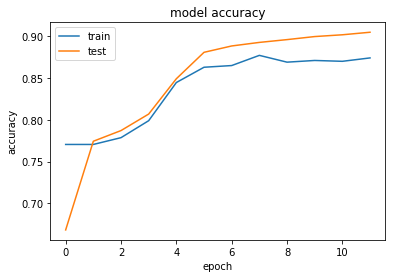

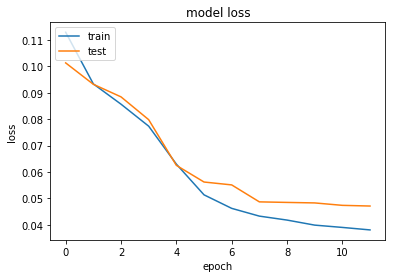

In [47]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(834, 2)


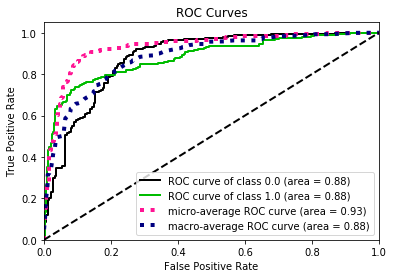

In [48]:
import scikitplot as skplt

print(y_pred_test.shape)
skplt.metrics.plot_roc_curve(old_y_test, y_pred_test)
plt.show()